# Which district to choose to settle down in Beijing?
## (Applied Data Science Capstone Week 4/5 Capstone Project)
________________________________

### Table of Contents
1. Introduction;
2. Data, Methodology and Results;
3. Discussion;
4. Conclusion.
5. Reference.
_________________________

### 1. Introduction.

Beijing is the capital city of China with a population of 21.54 million. 
Since Beijing is China's centre of politics, culture, international communication, and technological innovation, it constantly attracts both Chinese and foreign citizens who are willing to settle in and live a life here, especially the Millennials. 
However, Beijing is such a large city that its 16 districts have drastically different population, housing prices, average annual income, venue structure, and region area.
Therefore, it is of great interest for people who are planning to move to Beijing to analyze the data above,
so that one can make wise decision which district to settle in.
<b>Motivated by</b> finding directions in settlement in Beijing based on one's financial and living goals, 
this notebook provides preliminary results, specifically, visualization and clustering results on the above Beijing district profiles for settlement in one's ideal district.

The remainder of the notebook is organized as follows. 
We explain in detail the data, methodology, and the results of 16 Beijing districts in Section 2.
We discuss the experimental results in Section 3.
Finally, we conclude the notebook in Section 4.

### 2. Data, Methodology and Results. 
To analyze the population, housing prices, average annual income, venue structure, and region area of Beijing districts, in this section, we will analyze the following data: 

A) Non-location data: Housing Price, Income, and Population data for Beijing city, and\
B) Location data for Beijing city.

load required libraries.

In [1]:
# following code is mainly from the course tutorials

import numpy as np 

import pandas as pd 

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

# for plotting

import matplotlib.cm as cm

import matplotlib.colors as colors

import json # for geo data

import folium # for visualization of the geo data

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# for clustering

from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


### 2.1. load non-location data: 1. Housing price; 2. Population; 3. Income.

data income population: http://www.stats.gov.cn/, specifically, http://202.96.40.155/nj/qxnj/2019/zk/indexch.htm

data housing price from: https://www.anjuke.com/fangjia/beijing2020/ , specifically, we used the data during January 2020.

all above data was <b>manually</b> re-orginized in the following link:
https://github.com/bobchengyang/Coursera_Capstone/blob/master/beijing.csv

In this csv file, the columns represent:
1. 'id': the region name in Chinese;
2. 'price': the housing price in RMB per square meter;
3. 'price_k': the housing price in K RMB per square meter;
4. 'population': the population in tens of thousands;
5. 'population_k': the population in millions;
6. 'income': the income in RMB per year;
7. 'income_k': the income in K RMB per year.

load the above data as dataframe <b>beijing_df</b>.

In [2]:
beijing_df = pd.read_csv('beijing.csv',encoding='utf-8')
beijing_df

,id,price,price_k,population,population_m,income,income_k
0,顺义区,40444,40.444,116.9,1.169,36575,36.575
1,昌平区,41395,41.395,210.8,2.108,45399,45.399
2,朝阳区,72139,72.139,360.5,3.605,70746,70.746
3,大兴区,41720,41.720,179.6,1.796,43464,43.464
4,房山区,28608,28.608,118.8,1.188,39391,39.391
5,丰台区,59185,59.185,210.5,2.105,60144,60.144
6,海淀区,88242,88.242,335.8,3.358,78178,78.178
7,怀柔区,31580,31.580,41.4,0.414,36797,36.797
8,门头沟区,37878,37.878,33.1,0.331,49298,49.298
9,平谷区,24428,24.428,45.6,0.456,36012,36.012


order the rows by population (descending order).

In [3]:
beijing_df.sort_values('population',ascending=False,inplace=True)
beijing_df

,id,price,price_k,population,population_m,income,income_k
2,朝阳区,72139,72.139,360.5,3.605,70746,70.746
6,海淀区,88242,88.242,335.8,3.358,78178,78.178
1,昌平区,41395,41.395,210.8,2.108,45399,45.399
5,丰台区,59185,59.185,210.5,2.105,60144,60.144
3,大兴区,41720,41.720,179.6,1.796,43464,43.464
11,通州区,46757,46.757,157.8,1.578,40553,40.553
4,房山区,28608,28.608,118.8,1.188,39391,39.391
15,西城区,120524,120.524,117.9,1.179,75547,75.547
0,顺义区,40444,40.444,116.9,1.169,36575,36.575
14,东城区,98122,98.122,82.2,0.822,75547,75.547


define another dataframe <b>beijing_df_dv</b> that will be used for visualization.

In [4]:
beijing_df_dv = beijing_df[['id','price_k','income_k','population_m']]
beijing_df_dv.rename(columns={'price_k': 'Housing price (K RMB/m^2)', 
                              'income_k': 'Income (K RMB/year)', 
                              'population_m': 'Population (M)'}, inplace=True)

beijing_df_dv['Population (M)'] = 20*beijing_df_dv['Population (M)'] 
#for the sake of relatively pleasant scale for data visualization, here we multiply the population by 20.
beijing_df_dv

C:\Anaconda3\envs\bobcy\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Anaconda3\envs\bobcy\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,Housing price (K RMB/m^2),Income (K RMB/year),Population (M)
2,朝阳区,72.139,70.746,72.10
6,海淀区,88.242,78.178,67.16
1,昌平区,41.395,45.399,42.16
5,丰台区,59.185,60.144,42.10
3,大兴区,41.720,43.464,35.92
11,通州区,46.757,40.553,31.56
4,房山区,28.608,39.391,23.76
15,西城区,120.524,75.547,23.58
0,顺义区,40.444,36.575,23.38
14,东城区,98.122,75.547,16.44


define another dataframe <b>beijing_df_dv_org</b> that has the data in the appropirate units.

In [5]:
beijing_df_dv_org = beijing_df_dv.join(beijing_df['population_m'])
beijing_df_dv_org.drop('Population (M)',axis=1,inplace=True)
beijing_df_dv_org.set_index(beijing_df_dv_org['id'],inplace=True)
beijing_df_dv_org.drop(['id'],axis=1,inplace=True)
beijing_df_dv_org.index.name = None
beijing_df_dv_org

,Housing price (K RMB/m^2),Income (K RMB/year),population_m
朝阳区,72.139,70.746,3.605
海淀区,88.242,78.178,3.358
昌平区,41.395,45.399,2.108
丰台区,59.185,60.144,2.105
大兴区,41.720,43.464,1.796
通州区,46.757,40.553,1.578
房山区,28.608,39.391,1.188
西城区,120.524,75.547,1.179
顺义区,40.444,36.575,1.169
东城区,98.122,75.547,0.822


convert <b>beijing_df_dv_org</b> to an nd array

In [6]:
#beijing_df_dv_np = beijing_df_dv_org.to_numpy()
beijing_df_dv_np = beijing_df_dv_org.values
beijing_df_dv_np

array([[ 72.139,  70.746,   3.605],
       [ 88.242,  78.178,   3.358],
       [ 41.395,  45.399,   2.108],
       [ 59.185,  60.144,   2.105],
       [ 41.72 ,  43.464,   1.796],
       [ 46.757,  40.553,   1.578],
       [ 28.608,  39.391,   1.188],
       [120.524,  75.547,   1.179],
       [ 40.444,  36.575,   1.169],
       [ 98.122,  75.547,   0.822],
       [ 49.889,  71.244,   0.59 ],
       [ 24.625,  34.951,   0.495],
       [ 24.428,  36.012,   0.456],
       [ 31.58 ,  36.797,   0.414],
       [ 22.788,  33.887,   0.348],
       [ 37.878,  49.298,   0.331]])

reshape <b>beijing_df_dv_np</b> to <b>beijing_df_dv_np_v</b> that will be used for visualization

In [7]:
beijing_df_dv_np_v = np.reshape(beijing_df_dv_np.transpose(),(beijing_df_dv_np.shape[0]*beijing_df_dv_np.shape[1],1))
beijing_df_dv_np_v.shape

(48, 1)

set district name as the dataframe index

In [8]:
beijing_df_dv.set_index(beijing_df_dv['id'],inplace=True)
beijing_df_dv.drop(['id'],axis=1,inplace=True)
beijing_df_dv.index.name = None
beijing_df_dv

C:\Anaconda3\envs\bobcy\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Housing price (K RMB/m^2),Income (K RMB/year),Population (M)
朝阳区,72.139,70.746,72.10
海淀区,88.242,78.178,67.16
昌平区,41.395,45.399,42.16
丰台区,59.185,60.144,42.10
大兴区,41.720,43.464,35.92
通州区,46.757,40.553,31.56
房山区,28.608,39.391,23.76
西城区,120.524,75.547,23.58
顺义区,40.444,36.575,23.38
东城区,98.122,75.547,16.44


visualization of:
1. Housing price;
2. Income;
3. Population.

using <b>beijing_df_dv</b> and <b>beijing_df_dv_np_v</b>

In [9]:
ax = beijing_df_dv.plot(kind='bar',
                  figsize=(20,8),
                  width=0.8,
                  color=['#5cb85c','#5bc0de','#d9534f'])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis="x") 

#try to display Chinese in matplot
from pyplotz.pyplotz import PyplotZ
pltz = PyplotZ()
pltz.enable_chinese()
pltz.title('Housing Price, Income and Population of 16 Beijing Districts')
pltz.xticks(rotation=360) #rotate x label using matplotlib
pltz.automate_font_size(scale=0.8) # always put this statement at last(scale controls the overall font size)
ax.yaxis.set_visible(False)

# set individual bar lables using above list
current_bar = -1
for i in ax.patches:
    current_bar+=1
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.06, i.get_height()-2, \
            round(beijing_df_dv_np_v[current_bar,0],2), fontsize=11, color='black',rotation=90)

findings from the above figure:
1. Chaoyang district (朝阳区) has the largest population among all 16 districts.
2. Xicheng district (西城区) has the most expensive housing price among all 16 districts.
3. Haidian district (海淀区) has the highest annual income amonth all 16 districts.

### 2.2. load location data.

In [10]:
# encoding by utf8 so that the Chinese characters can be normally displayed
#beijing_geo = open('beijing.geojson', encoding="utf8").read() 
address = 'Beijing, China'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Beijing latitude: {:2.2f}'.format(latitude))
print('Beijing longitude: {:2.2f}'.format(longitude))

beijing_map = folium.Map(location = [latitude, longitude], zoom_start = 9)
beijing_map

# the following code was used for getting the centroid of each district.

# #PyGeoj is a simple Python GeoJSON file reader and writer intended for end-users. 
# #It exposees dictionary structures as high level objects with convenience methods, 
# #so the user does not have to get caught up in the details of the format specification.
# import pygeoj

# beijing_gj = pygeoj.load(filepath="beijing.geojson")
# # len(beijing_gj) # the number of features
# # beijing_gj.bbox # the bounding box region of the entire file
# # beijing_gj.crs # the coordinate reference system
# # beijing_gj.all_attributes # retrieves the combined set of all feature attributes
# # beijing_gj.common_attributes # retrieves only those field attributes that are common to all features
# beijing_gj.get_feature(0).properties

# #check how many features in the geojson file
# len(beijing_gj)

# beijing_gj.get_feature(10).properties['CENTROID_Y']

C:\Anaconda3\envs\bobcy\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


Beijing latitude: 39.91
Beijing longitude: 116.39


load json file <b>110110_1.json</b> (originally <b>110110.json</b>) (Beijing location data) from https://github.com/longwosion/geojson-map-china

In [11]:
# read json file as a dictionary
import json

# here, we made slight modification on the original 110110.json file so that the coordinates are of x * 2 dimensions.
with open('110100_1.json',encoding='utf-8') as json_file:
    beijing_geo = json.load(json_file)
beijing_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': '顺义区', 'id': '110113'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[116.863170195313, 40.2896681953126],
     [116.873267851563, 40.2634804511719],
     [116.898316679688, 40.2285353828125],
     [116.927345, 40.223843],
     [116.934151640625, 40.2196486640625],
     [116.927926054688, 40.1996486640626],
     [116.944151640625, 40.1896486640626],
     [116.940538359375, 40.1780373359375],
     [116.970382109375, 40.1596486640626],
     [116.960777617188, 40.1288112617188],
     [116.973912382813, 40.0888747382813],
     [116.970787382813, 40.0788430000001],
     [116.974151640625, 40.0680373359375],
     [116.961158476563, 40.0600307441407],
     [116.957345, 40.0438430000001],
     [116.927613554688, 40.0511452460938],
     [116.912345, 40.0477223945313],
     [116.902345, 40.0499636054687],
     [116.872345, 40.0432387519532],
     [116.83033328125, 40.0526564765625],
     [116

get <b>centroid</b> for each district.

In [12]:
#show all keys of the dictionary beijing_geo
beijing_geo.keys()
beijing_geo.values()
#check how many features in the geojson file
len(beijing_geo['features'])
#check the keys of the dict
beijing_geo['features'][0].keys()
beijing_geo['features'][0]['geometry'].keys()
beijing_geo['features'][0]['geometry']['coordinates']
len(beijing_geo)
for i in range(len(beijing_geo['features'])):
    beijing_temp = beijing_geo['features'][i]['geometry']['coordinates']
    print('current region: {}'.format(i+1))
    centroid = np.mean(beijing_temp, axis = 0)
    print('centroid latitude: {}; centroid longitude: {}'.format(centroid[1],centroid[0]))
    #add the latitude and longitude information into the original dataframe
    beijing_df.loc[i,'latitude'] = centroid[1]
    beijing_df.loc[i,'longitude'] = centroid[0]
beijing_df

current region: 1
centroid latitude: 40.142371612480815; centroid longitude: 116.73817571849403
current region: 2
centroid latitude: 40.210784944067065; centroid longitude: 116.20108565896763
current region: 3
centroid latitude: 39.955555021938636; centroid longitude: 116.52026900981113
current region: 4
centroid latitude: 39.64294634183001; centroid longitude: 116.45345695709769
current region: 5
centroid latitude: 39.7019039042403; centroid longitude: 115.83885032155817
current region: 6
centroid latitude: 39.83224333637156; centroid longitude: 116.26622859917559
current region: 7
centroid latitude: 40.02425206074722; centroid longitude: 116.24528971153865
current region: 8
centroid latitude: 40.64990595072119; centroid longitude: 116.56799269702974
current region: 9
centroid latitude: 39.99430770767164; centroid longitude: 115.81108379354528
current region: 10
centroid latitude: 40.198224103515656; centroid longitude: 117.13163976868884
current region: 11
centroid latitude: 39.93971

,id,price,price_k,population,population_m,income,income_k,latitude,longitude
2,朝阳区,72139,72.139,360.5,3.605,70746,70.746,39.955555,116.520269
6,海淀区,88242,88.242,335.8,3.358,78178,78.178,40.024252,116.245290
1,昌平区,41395,41.395,210.8,2.108,45399,45.399,40.210785,116.201086
5,丰台区,59185,59.185,210.5,2.105,60144,60.144,39.832243,116.266229
3,大兴区,41720,41.720,179.6,1.796,43464,43.464,39.642946,116.453457
11,通州区,46757,46.757,157.8,1.578,40553,40.553,39.812867,116.720561
4,房山区,28608,28.608,118.8,1.188,39391,39.391,39.701904,115.838850
15,西城区,120524,120.524,117.9,1.179,75547,75.547,39.932061,116.364889
0,顺义区,40444,40.444,116.9,1.169,36575,36.575,40.142372,116.738176
14,东城区,98122,98.122,82.2,0.822,75547,75.547,39.909897,116.404088


load original json file <b>110110.json</b> (Beijing location data) from https://github.com/longwosion/geojson-map-china. \
visualize the coordinates info in json file <b>110110.json</b>.

In [30]:
beijing_geo = open('110100.json',encoding='utf-8').read()

folium.GeoJson(
    beijing_geo,
    name='geojson'
).add_to(beijing_map)

beijing_map

visualize <b>Population in Beijing</b>.

In [43]:
beijing_map = folium.Map(location=[latitude, longitude], zoom_start=8)
folium.Choropleth(
    geo_data=beijing_geo,
    data=beijing_df,
    columns=['id','population_m'],
    key_on='feature.properties.name',
    name='Population (M)',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population in Beijing (M)'
).add_to(beijing_map)

folium.LayerControl().add_to(beijing_map)
# display map
beijing_map

visualize <b>Income in Beijing</b>.

In [44]:
beijing_map = folium.Map(location=[latitude, longitude], zoom_start=8)
folium.Choropleth(
    geo_data=beijing_geo,
    data=beijing_df,
    columns=['id','income_k'],
    key_on='feature.properties.name',
    name='Income (K RMB/year)',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Income in Beijing (K RMB/year)'
).add_to(beijing_map)

folium.LayerControl().add_to(beijing_map)
# display map
beijing_map

visualize <b>Housing price in Beijing</b>.

In [39]:
beijing_map = folium.Map(location=[latitude, longitude], zoom_start=8)
folium.Choropleth(
    geo_data=beijing_geo,
    data=beijing_df,
    columns=['id','price_k'],
    key_on='feature.properties.name',
    name='Housing price (K RMB/m^2)',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Housing price in Beijing (K RMB/m^2)'
).add_to(beijing_map)

folium.LayerControl().add_to(beijing_map)
# display map
beijing_map

visualize the following:
<b>PHI index: Population * (Housing price/Income)</b>.

PHI index is a heuristically defined metric. It increases as the population does and as 'Housing price/Income' does.

The larger the PHI index, the higher the financial stress is.

In [17]:
beijing_df_phi = beijing_df['population_m']*beijing_df['price_k']/beijing_df['income_k']
beijing_df_phi = pd.DataFrame(beijing_df_phi)
beijing_df_phi['id'] = beijing_df['id']
fixed_columns = [beijing_df_phi.columns[-1]] + list(beijing_df_phi.columns[:-1])
beijing_df_phi = beijing_df_phi[fixed_columns]
beijing_df_phi.rename({beijing_df_phi.columns[1]:'PHI'},axis=1,inplace=True)
beijing_df_phi

,id,PHI
2,朝阳区,3.675983
6,海淀区,3.790282
1,昌平区,1.922083
5,丰台区,2.071436
3,大兴区,1.723935
11,通州区,1.819410
4,房山区,0.862794
15,西城区,1.880919
0,顺义区,1.292660
14,东城区,1.067631


In [47]:
beijing_map = folium.Map(location=[latitude, longitude], zoom_start=8)
folium.Choropleth(
    geo_data=beijing_geo,
    data=beijing_df_phi,
    columns=['id','PHI'],
    key_on='feature.properties.name',
    name='PHI index',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='PHI index'
).add_to(beijing_map)

folium.LayerControl().add_to(beijing_map)
# display map
beijing_map

visualize the centroid of each district.

load <b>Foursquare</b> credentails.

In [48]:
CLIENT_ID = 'QNNUKXQRPQS2C25S13U21GSR2MQVK11GC2OA2ZZMHEQVZ2XL' # your Foursquare ID
CLIENT_SECRET = 'Y2X35I5GF0O0BT2LW3FOVTHVZSHBJ4NV5YY0X5APSXBJ3VUF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QNNUKXQRPQS2C25S13U21GSR2MQVK11GC2OA2ZZMHEQVZ2XL
CLIENT_SECRET:Y2X35I5GF0O0BT2LW3FOVTHVZSHBJ4NV5YY0X5APSXBJ3VUF


create a function (from the tutorial in the course) to get the top <b>50</b> venues that are in 'region_id' within a radius of <b>500</b> meters.

In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

get the venues nearby the centroid of each district.\
check the returned venues.\
<b>Note:</b>Since Beijing districts have large diversity in their region area, we adopt the following process to select <b>appropirate radius</b> <font color='red'>instead of</font> using a <b><font color='red'>fixed one</font></b>.

In [51]:
for beijing_df_current_idx in list(range(0,beijing_df.shape[0])):
    
    limit_candidate = 0
    radius_temp = 2000

    while limit_candidate < 50:
        
        try:

            beijing_venues = getNearbyVenues(names=beijing_df['id'][beijing_df_current_idx:beijing_df_current_idx+1],
                                 latitudes=beijing_df['latitude'][beijing_df_current_idx:beijing_df_current_idx+1],
                                 longitudes=beijing_df['longitude'][beijing_df_current_idx:beijing_df_current_idx+1],
                                 radius=radius_temp
                                 ) 
            limit_candidate = beijing_venues.shape[0]
            
        except ValueError:
            print('value error...' + 'radius_temp = ' + str(radius_temp))

        radius_temp += 2000
        
    print('limit_candidate = ' + str(limit_candidate) + ' | radius_temp = ' + str(radius_temp))    
        
    if beijing_df_current_idx == 0:
        beijing_venues_final = beijing_venues
    else:
        beijing_venues_final = pd.concat([beijing_venues_final,beijing_venues])

朝阳区
朝阳区
朝阳区
limit_candidate = 50 | radius_temp = 8000
海淀区
海淀区
海淀区
海淀区
limit_candidate = 50 | radius_temp = 10000
昌平区
昌平区
昌平区
昌平区
昌平区
昌平区
昌平区
昌平区
昌平区
昌平区
昌平区
昌平区
昌平区
limit_candidate = 50 | radius_temp = 28000
丰台区
丰台区
丰台区
丰台区
丰台区
丰台区
limit_candidate = 50 | radius_temp = 14000
大兴区
value error...radius_temp = 2000
大兴区
大兴区
大兴区
大兴区
大兴区
大兴区
大兴区
大兴区
大兴区
大兴区
大兴区
大兴区
大兴区
limit_candidate = 50 | radius_temp = 30000
通州区
value error...radius_temp = 2000
通州区
通州区
通州区
通州区
通州区
通州区
通州区
通州区
通州区
通州区
通州区
通州区
limit_candidate = 50 | radius_temp = 28000
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
房山区
limit_candidate = 50 | radius_temp = 56000
西城区
limit_candidate = 50 | radius_temp = 4000
顺义区
顺义区
顺义区
顺义区
顺义区
顺义区
顺义区
顺义区
顺义区
limit_candidate = 50 | radius_temp = 20000
东城区
limit_candidate = 50 | radius_temp = 4000
石景山区
石景山区
石景山区
石景山区
石景山区
石景山区
limit_candidate = 50 | radius_temp = 14000
密云县
value error...radius_temp = 2000
密云县
value error...radius_temp = 4

In [70]:
beijing_venues = beijing_venues_final
print(beijing_venues.shape)
beijing_venues.head()

(800, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,朝阳区,39.955555,116.520269,Maan Coffee,39.971858,116.504744,Café
1,朝阳区,39.955555,116.520269,East Beijing (东隅),39.967369,116.485615,Hotel
2,朝阳区,39.955555,116.520269,Indigo (颐堤港),39.968919,116.484762,Shopping Mall
3,朝阳区,39.955555,116.520269,Page One 叶壹堂,39.968382,116.484582,Bookstore
4,朝阳区,39.955555,116.520269,NUO Hotel Beijing (北京诺金酒店),39.974946,116.474571,Hotel


check how many venues were returned for each <b>neighborhood</b>.

In [53]:
beijing_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
东城区,50,50,50,50,50,50
丰台区,50,50,50,50,50,50
大兴区,50,50,50,50,50,50
密云县,50,50,50,50,50,50
平谷区,50,50,50,50,50,50
延庆县,50,50,50,50,50,50
怀柔区,50,50,50,50,50,50
房山区,50,50,50,50,50,50
昌平区,50,50,50,50,50,50


check how many <b>unique</b> categories can be curated from all the returned venues.

In [54]:
print('There are {} uniques categories.'.format(len(beijing_venues['Venue Category'].unique())))

There are 133 uniques categories.


<b>digitize</b> all neighborhoods by one hot encoding.

In [55]:
# one hot encoding
beijing_onehot = pd.get_dummies(beijing_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
beijing_onehot['Neighbourhood'] = beijing_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [beijing_onehot.columns[-1]] + list(beijing_onehot.columns[:-1])
beijing_onehot = beijing_onehot[fixed_columns]

beijing_onehot.head()

,Neighbourhood,Airport,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Beijing Restaurant,Big Box Store,Bistro,Bookstore,Border Crossing,Botanical Garden,Brewery,Buffet,Cable Car,Café,Cantonese Restaurant,Castle,Cha Chaan Teng,Chinese Aristocrat Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Forest,French Restaurant,Furniture / Home Store,Garden,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Hainan Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Jiangsu Restaurant,Lake,Lounge,Malay Restaurant,Massage Studio,Mexican Restaurant,Mountain,Movie Theater,Multiplex,Museum,National Park,Nature Preserve,New American Restaurant,Noodle House,Outlet Mall,Park,Peking Duck Restaurant,Performing Arts Venue,Pizza Place,Pool,Public Art,Ramen Restaurant,Reservoir,Resort,Rest Area,Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Shaanxi Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Ski Chairlift,Spa,Stadium,Supermarket,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Temple,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Transportation Service,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Village,Warehouse Store,Water Park,Xinjiang Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,朝阳区,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,朝阳区,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,朝阳区,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,朝阳区,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,朝阳区,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


check the shape of the digitized version <b>beijing_onehot</b> of <b>beijing_venues</b>.

In [56]:
beijing_onehot.shape

(800, 134)

group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category.

In [57]:
beijing_grouped = beijing_onehot.groupby('Neighbourhood').mean().reset_index()
beijing_grouped

,Neighbourhood,Airport,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Beijing Restaurant,Big Box Store,Bistro,Bookstore,Border Crossing,Botanical Garden,Brewery,Buffet,Cable Car,Café,Cantonese Restaurant,Castle,Cha Chaan Teng,Chinese Aristocrat Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Forest,French Restaurant,Furniture / Home Store,Garden,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Hainan Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Jiangsu Restaurant,Lake,Lounge,Malay Restaurant,Massage Studio,Mexican Restaurant,Mountain,Movie Theater,Multiplex,Museum,National Park,Nature Preserve,New American Restaurant,Noodle House,Outlet Mall,Park,Peking Duck Restaurant,Performing Arts Venue,Pizza Place,Pool,Public Art,Ramen Restaurant,Reservoir,Resort,Rest Area,Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Shaanxi Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Ski Chairlift,Spa,Stadium,Supermarket,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Temple,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Transportation Service,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Village,Warehouse Store,Water Park,Xinjiang Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,东城区,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.08,0.02,0.02,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.20,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00
1,丰台区,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.04,0.00,0.00,0.02,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.18,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.06,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00
2,大兴区,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.08,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.06,0.00,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
3,密云县,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.02,0.00,0.00

check the shape of the grouped version <b>beijing_grouped</b> of <b>beijing_onehot</b>.

In [58]:
beijing_grouped.shape

(16, 134)

print each neighborhood along with the top <b>10 most common venues</b>.

In [72]:
num_top_venues = 3

for hood in beijing_grouped['Neighbourhood']:
    print("----"+str(hood)+"----")
    temp = beijing_grouped[beijing_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

----东城区----
                venue  freq
0       Historic Site  0.24
1               Hotel  0.20
2  Chinese Restaurant  0.08
----丰台区----
           venue  freq
0    Coffee Shop  0.20
1          Hotel  0.18
2  Shopping Mall  0.12
----大兴区----
           venue  freq
0    Coffee Shop  0.22
1           Park  0.08
2  Shopping Mall  0.08
----密云县----
           venue  freq
0  Historic Site  0.18
1          Hotel  0.10
2         Resort  0.06
----平谷区----
                venue  freq
0               Hotel  0.12
1       Historic Site  0.12
2  Chinese Restaurant  0.08
----延庆县----
                venue  freq
0       Historic Site  0.24
1  Chinese Restaurant  0.12
2       National Park  0.04
----怀柔区----
                venue  freq
0       Historic Site  0.22
1              Resort  0.08
2  Chinese Restaurant  0.06
----房山区----
           venue  freq
0  Historic Site  0.30
1           Park  0.12
2          Hotel  0.10
----昌平区----
                  venue  freq
0         Historic Site  0.18
1  Fast Food Res

we can see that the following districts have lots of historic sites:
1. Dongcheng district (东城区).
2. Minyun district (密云县).
3. Pinggu district (平谷区).
4. Yanqing district (延庆县).
5. Huairou district (怀柔区).
6. Fangshan district (房山区).
7. Changping district (昌平区).
8. Haidian district (海淀区).
9. Mentougou district (门头沟区).

write a function (from the tutorial in the course) to sort the venues in <b>descending</b> order.

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

create the new dataframe and display the <b>top 3 venues</b> for each neighborhood.

In [61]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = beijing_grouped['Neighbourhood']

for ind in np.arange(beijing_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(beijing_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,东城区,Historic Site,Hotel,Chinese Restaurant
1,丰台区,Coffee Shop,Hotel,Shopping Mall
2,大兴区,Coffee Shop,Park,Shopping Mall
3,密云县,Historic Site,Hotel,Resort
4,平谷区,Hotel,Historic Site,Chinese Restaurant
5,延庆县,Historic Site,Chinese Restaurant,Fast Food Restaurant
6,怀柔区,Historic Site,Resort,Ski Area
7,房山区,Historic Site,Park,Hotel
8,昌平区,Historic Site,Fast Food Restaurant,Coffee Shop
9,朝阳区,Hotel,Café,Japanese Restaurant


### 2.3. Clustering the neighborhoods

run <b>k-means</b> to cluster the neighborhood into <b>k</b> clusters. \
we need to choose an appropirate k for k-means clustering.
here, we reference: https://predictivehacks.com/k-means-elbow-method-code-for-python/ \
and https://www.linkedin.com/pulse/housing-sales-prices-venues-data-analysis-ofistanbul-sercan-y%C4%B1ld%C4%B1z/.
where the Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the <b>“elbow”</b> (the point of inflection on the curve) 
is the best value of k.

In [62]:
distortions = []
kclusters_K = range(1,10)

beijing_grouped_clustering = beijing_grouped.drop('Neighbourhood', 1)

for kclusters in kclusters_K:
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(beijing_grouped_clustering)
    distortions.append(kmeans.inertia_)

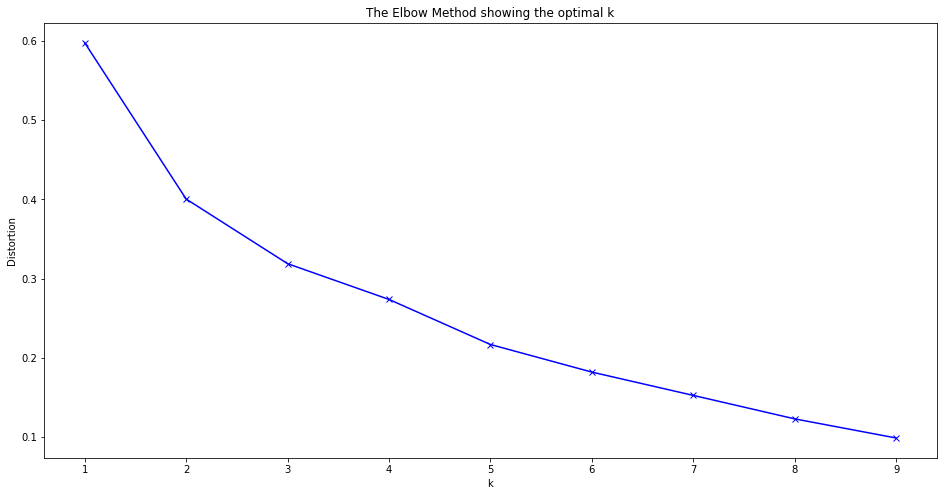

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(16,8))
plt.plot(kclusters_K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

the <b>'elbow'</b> is at k = 2. therefore, we set <b>k = 2</b>.

In [64]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(beijing_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

create a new dataframe that includes the cluster as well as the <b>top 3 venues</b> for each neighborhood.

In [74]:
# neighborhoods_venues_sorted.drop('Cluster Labels',axis=1,inplace=True)
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

beijing_merged = beijing_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
beijing_merged = beijing_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='id')

beijing_merged # check the last columns!

,id,price,price_k,population,population_m,income,income_k,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
2,朝阳区,72139,72.139,360.5,3.605,70746,70.746,39.955555,116.520269,1,Hotel,Café,Japanese Restaurant
6,海淀区,88242,88.242,335.8,3.358,78178,78.178,40.024252,116.245290,0,Historic Site,Chinese Restaurant,Coffee Shop
1,昌平区,41395,41.395,210.8,2.108,45399,45.399,40.210785,116.201086,0,Historic Site,Fast Food Restaurant,Coffee Shop
5,丰台区,59185,59.185,210.5,2.105,60144,60.144,39.832243,116.266229,1,Coffee Shop,Hotel,Shopping Mall
3,大兴区,41720,41.720,179.6,1.796,43464,43.464,39.642946,116.453457,1,Coffee Shop,Park,Shopping Mall
11,通州区,46757,46.757,157.8,1.578,40553,40.553,39.812867,116.720561,1,Hotel,Shopping Mall,Park
4,房山区,28608,28.608,118.8,1.188,39391,39.391,39.701904,115.838850,0,Historic Site,Park,Hotel
15,西城区,120524,120.524,117.9,1.179,75547,75.547,39.932061,116.364889,1,Coffee Shop,Chinese Restaurant,Fast Food Restaurant
0,顺义区,40444,40.444,116.9,1.169,36575,36.575,40.142372,116.738176,1,Coffee Shop,Fast Food Restaurant,Hotel
14,东城区,98122,98.122,82.2,0.822,75547,75.547,39.909897,116.404088,0,Historic Site,Hotel,Chinese Restaurant


<b>visualize</b> the clustering results. \
<b>Note:</b> one can <b>left-click</b> the color circles in the map to see the name of the district. 

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(beijing_merged['latitude'], 
                                  beijing_merged['longitude'], 
                                  beijing_merged['id'], 
                                  beijing_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(beijing_map)
       
beijing_map

### 2.4. Analysis of the clusters

first, we list the districts that lie in the same cluster.

<b>CLUSTER 0: Historic cluster.</b> we list the entries in cluster 0 in the descending order of district population.

In [67]:
beijing_merged.loc[beijing_merged['Cluster Labels'] == 0, 
                   beijing_merged.columns]

,id,price,price_k,population,population_m,income,income_k,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
6,海淀区,88242,88.242,335.8,3.358,78178,78.178,40.024252,116.245290,0,Historic Site,Chinese Restaurant,Coffee Shop
1,昌平区,41395,41.395,210.8,2.108,45399,45.399,40.210785,116.201086,0,Historic Site,Fast Food Restaurant,Coffee Shop
4,房山区,28608,28.608,118.8,1.188,39391,39.391,39.701904,115.838850,0,Historic Site,Park,Hotel
14,东城区,98122,98.122,82.2,0.822,75547,75.547,39.909897,116.404088,0,Historic Site,Hotel,Chinese Restaurant
12,密云县,24625,24.625,49.5,0.495,34951,34.951,40.540558,117.026101,0,Historic Site,Hotel,Resort
9,平谷区,24428,24.428,45.6,0.456,36012,36.012,40.198224,117.131640,0,Hotel,Historic Site,Chinese Restaurant
7,怀柔区,31580,31.580,41.4,0.414,36797,36.797,40.649906,116.567993,0,Historic Site,Resort,Ski Area
13,延庆县,22788,22.788,34.8,0.348,33887,33.887,40.495297,116.164841,0,Historic Site,Chinese Restaurant,Fast Food Restaurant
8,门头沟区,37878,37.878,33.1,0.331,49298,49.298,39.994308,115.811084,0,Historic Site,Park,Hotel


Analysis of Cluster 0: 
1. The most common venues are historic site, restaurants and coffee shops.
2. The district housing prices range between 22K and 98K RMB per square meters.  
3. The clustered districts mainly lie in the center, west, north, and north-east regions of Beijing.

<b>CLUSTER 1: Coffee cluster.</b> we list the entries in cluster 1 in the descending order of district population.

In [68]:
beijing_merged.loc[beijing_merged['Cluster Labels'] == 1, 
                   beijing_merged.columns]

,id,price,price_k,population,population_m,income,income_k,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
2,朝阳区,72139,72.139,360.5,3.605,70746,70.746,39.955555,116.520269,1,Hotel,Café,Japanese Restaurant
5,丰台区,59185,59.185,210.5,2.105,60144,60.144,39.832243,116.266229,1,Coffee Shop,Hotel,Shopping Mall
3,大兴区,41720,41.720,179.6,1.796,43464,43.464,39.642946,116.453457,1,Coffee Shop,Park,Shopping Mall
11,通州区,46757,46.757,157.8,1.578,40553,40.553,39.812867,116.720561,1,Hotel,Shopping Mall,Park
15,西城区,120524,120.524,117.9,1.179,75547,75.547,39.932061,116.364889,1,Coffee Shop,Chinese Restaurant,Fast Food Restaurant
0,顺义区,40444,40.444,116.9,1.169,36575,36.575,40.142372,116.738176,1,Coffee Shop,Fast Food Restaurant,Hotel
10,石景山区,49889,49.889,59.0,0.590,71244,71.244,39.939716,116.169618,1,Fast Food Restaurant,Hotel,Historic Site


Analysis of Cluster 1:
1. The most common venues are coffee shops, restaurants and shopping malls. 
2. The district housing prices range between 40K and 120K RMB per square meters.  
3. The clustered districts mainly lie in the center and south-east regions of Beijing.

### 3. Discussion.
1. PHI index wise: the average housing price of Cluster 1 is much lower than Cluster 2. However, there is not much difference between Clusters 0 and 1 in terms of the annual income. People should consider the <b>financial stress level</b> before moving in one of these districts. Especially Haidian (海淀区) and Chaoyang (朝阳区) Districts that have very high PHI indices.
2. Living style wise: Cluster 1 generally has more historic sites than Cluster 0, in addition to the fact that Cluster 1 is closer to the center of Beijing than Cluster 0. Therefore, people who prefer 1) short-distance commuting during weekdays and 2) short-distance travel during weekends may consider move to the districts in Cluster 1. Since the gasoline/electric cost for the commuting/travel would be much lower than living in most of the districts in Cluster 0.

### 4. Conclusion.

We analyzed the living/working charactistics of the 16 district of Beijing cities and provided settlement advice for millennials. 
We did this by the following processes:
1. We used the heuristically defined PHI index, that is based on the housing price, income, and population in 16 districts of Beijing cities, to indicate the potential, financial stress living in a Beijing district.
2. We used clustering results of the top 3 most common venues in each of the 16 Beijing districts to provide commuting/travel cost comparison.

We suggest that Haidian (海淀区 in Chinese) district may be the ideal district for people who can handle the relatively high financial stress and prefer short-distance travel for historic sites.
In addition, we suggest that Chaoyang (朝阳区 in Chinese) district may be the ieal district for people who can handle the high financial stress but prefer day-to-day recreational activities rather than distance travel.

### 5. References.
[1] Income data and population data in Beijing districts as of January 2020: http://202.96.40.155/nj/qxnj/2019/zk/indexch.htm.

[2] Housing price data in Beijing districts as of January 2020: https://www.anjuke.com/fangjia/beijing2020/.

[3] Location data for Beijing districts: https://github.com/longwosion/geojson-map-china.

[4] Elbow method for an appropirate k for k-means clustering: https://predictivehacks.com/k-means-elbow-method-code-for-python/.